In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import joblib
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [8]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
df['flower_name']='NaN'
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,NaN
1,4.9,3.0,1.4,0.2,0,NaN
2,4.7,3.2,1.3,0.2,0,NaN
3,4.6,3.1,1.5,0.2,0,NaN
4,5.0,3.6,1.4,0.2,0,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN
146,6.3,2.5,5.0,1.9,2,NaN
147,6.5,3.0,5.2,2.0,2,NaN
148,6.2,3.4,5.4,2.3,2,NaN


In [18]:
count =0
for i in df.target:
    df['flower_name'][count] = iris.target_names[i]
    count= count+1
df



<ipython-input-18-b3ebe3637599>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flower_name'][count] = iris.target_names[i]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [20]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df0.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


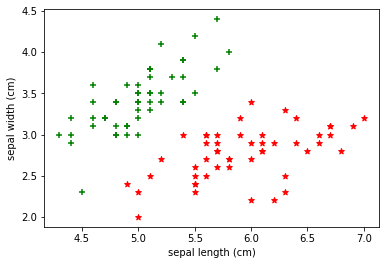

In [30]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',color="green")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',color="red")


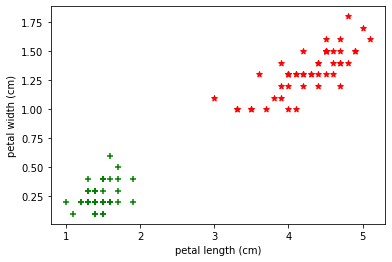

In [31]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+',color="green")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',color="red")

In [33]:
x= df.drop(['target','flower_name'],axis="columns")
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
y =df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [68]:
svm_model = svm.SVC()

In [69]:
svm_model.fit(x_train,y_train)

SVC()

In [70]:
svm_model.score(x_test,y_test)


0.9777777777777777

In [73]:
pred = svm_model.predict(x_test)

In [74]:
cm = confusion_matrix(y_test,pred)
cm

array([[20,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

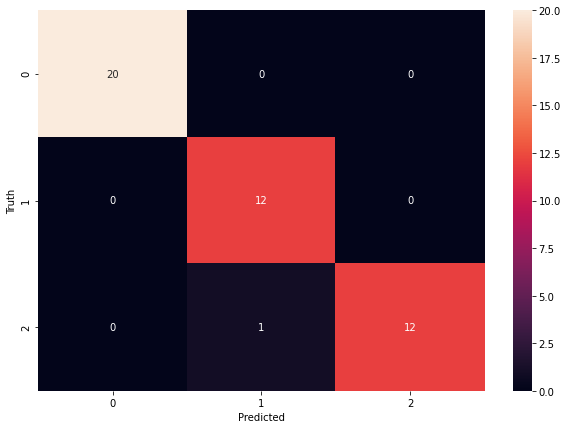

In [75]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [76]:
joblib.dump(svm_model,"iris_svm_model")

['iris_svm_model']